In [1]:
import quandl

In [2]:
AUTH_TOKEN = "ndBQKFBT67jPFP6s9uET"


In [28]:
data = quandl.get("WIKI/AMZN", start_date="2017-01-31", end_date="2018-08-21",api_key=ACCESS_KEY)

In [29]:
print(data)

               Open       High        Low    Close      Volume  Ex-Dividend  \
Date                                                                          
2017-01-31   823.75   826.9900   819.5600   823.48   3137196.0          0.0   
2017-02-01   829.21   833.7800   824.9400   832.35   3850181.0          0.0   
2017-02-02   836.59   842.4900   828.2600   839.95   7350492.0          0.0   
2017-02-03   806.72   818.3000   804.0000   810.20  10868773.0          0.0   
2017-02-06   809.80   810.7200   803.0000   807.64   3897301.0          0.0   
2017-02-07   809.31   816.1600   807.5000   812.50   3466091.0          0.0   
2017-02-08   812.69   821.4790   812.5000   819.71   2857985.0          0.0   
2017-02-09   821.60   825.0000   819.7100   821.36   2484948.0          0.0   
2017-02-10   823.82   828.0000   822.8500   827.46   2429609.0          0.0   
2017-02-13   831.62   842.9999   828.5500   836.53   4172618.0          0.0   
2017-02-14   837.00   838.3100   831.4522   836.39  

In [30]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [31]:
print(data.shape)

(289, 12)


In [1]:
# image heatmaps

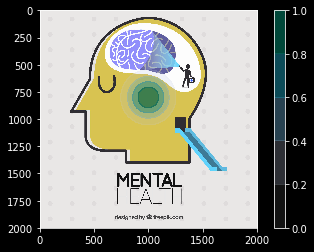

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.style.use('dark_background')
import cv2

#2D Gaussian function
def twoD_Gaussian(x,y, xo, yo, sigma_x, sigma_y):
    a = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    c = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    g = np.exp( - (a*((x-xo)**2) + c*((y-yo)**2)))
    return g.ravel()


def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap


#Use base cmap to create transparent
mycmap = transparent_cmap(plt.cm.PuBuGn)


# Import image and get x and y extents
I = cv2.imread('../381003-PC1HWV-475.jpg')
p = np.asarray(I).astype('float')
w, h = I.shape[0],I.shape[1]
y, x = np.mgrid[0:h, 0:w]

#Plot image and overlay colormap
fig, ax = plt.subplots(1, 1)
ax.imshow(I)
Gauss = twoD_Gaussian(x, y, .5*x.max(), .4*y.max(), .1*x.max(), .1*y.max())
cb = ax.contourf(x, y, Gauss.reshape(x.shape[0], y.shape[1]), 5, cmap=mycmap)
plt.colorbar(cb)
plt.show()

In [9]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [6]:
Gauss = twoD_Gaussian(x, y, .5*x.max(), .4*y.max(), .1*x.max(), .1*y.max())


In [21]:
print(Gauss.shape)

(4000000,)


In [23]:
Gauss.reshape(x.shape[0], y.shape[1]).shape

(2000, 2000)